In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.integrate import solve_ivp

plt.style.use(["science","bright","grid"])

In [82]:
def mutal_capacitance_adjacent_spheres(eps_r: float, np_radius1: float, np_radius2: float, np_distance: float)->float:

    d       = (np_radius1 + np_radius2 + np_distance)
    factor  = 4*3.14159265359*8.85418781762039*0.001*eps_r*(np_radius1*np_radius2)/d
    # Paper approx sum_val = 1
    sum_val = sum([1,(np_radius1*np_radius2)/(d**2-2*np_radius1*np_radius2),
                    ((np_radius1**2)*(np_radius2**2))/(d**4-4*(d**2)*np_radius1*np_radius2+3*(np_radius1**2)*(np_radius2**2))])
    cap     = factor*sum_val

    return np.round(cap,2)*1e-18

In [83]:
mutal_capacitance_adjacent_spheres(2.6, 10, 10, 1)

np.float64(2.2400000000000004e-18)

In [133]:
N   = 5
R   = 25e6
C   = 2.24e-18
U0  = 1.0
Ue  = 0.
t_s = (0, 1e-9)

In [160]:
A   = np.zeros((N+2,N+2))
B   = np.zeros((N+2,N+2))
for i in range(N+2):
    if i == 0:
        A[i,i+1]    = 1
    elif i == 1:
        A[i,i]      = -2
        A[i,i+1]    = 1
    elif i == N:
        A[i,i-1]    = 1
        A[i,i]      = -2
    elif i == N + 1:
        A[i,i-1]    = 1
    else:
        A[i,i-1]    = 1
        A[i,i]      = -2
        A[i,i+1]    = 1
for i in range(N):
    if i == 0:
        B[i,i]      = 2
        B[i,i+1]    = -1
    elif i == N + 1:
        B[i,i-1]    = -1
        B[i,i]      = 2
    else:
        B[i,i-1]    = -1
        B[i,i]      = 2
        B[i,i+1]    = -1

In [161]:
np.linalg.inv(B)

LinAlgError: Singular matrix

In [158]:
A   = np.zeros((N,N))
for i in range(N):
    if i == 0:
        A[i,i]      = -2
        A[i,i+1]    = 1
    elif i == N - 1:
        A[i,i-1]    = 1
        A[i,i]      = -2
    else:
        A[i,i-1]    = 1
        A[i,i]      = -2
        A[i,i+1]    = 1
A

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [168]:
def rc_ladder(t, U):
    A   = np.zeros((N,N))
    B   = np.zeros((N,N))
    for i in range(N):
        if i == 0:
            A[i,i]      = -2
            A[i,i+1]    = 1
        elif i == N - 1:
            A[i,i-1]    = 1
            A[i,i]      = -2
        else:
            A[i,i-1]    = 1
            A[i,i]      = -2
            A[i,i+1]    = 1
    for i in range(N):
        if i == 0:
            B[i,i]      = 2
            B[i,i+1]    = -1
        elif i == N - 1:
            B[i,i-1]    = -1
            B[i,i]      = 2
        else:
            B[i,i-1]    = -1
            B[i,i]      = 2
            B[i,i+1]    = -1

    dUdt    = np.linalg.solve(A, (1 / (R*C)) * B @ U)
    return dUdt

In [169]:
def rc_ladder(t, U):
    A   = np.zeros((N+2,N+2))
    B   = np.zeros((N+2,N+2))
    for i in range(N+2):
        if i == 0:
            A[i,i+1]    = 1
        elif i == 1:
            A[i,i]      = -2
            A[i,i+1]    = 1
        elif i == N:
            A[i,i-1]    = 1
            A[i,i]      = -2
        elif i == N + 1:
            A[i,i-1]    = 1
        else:
            A[i,i-1]    = 1
            A[i,i]      = -2
            A[i,i+1]    = 1
    for i in range(N+2):
        if i == 0:
            B[i,i]      = 1
            B[i,i+1]    = -1
        elif i == N + 1:
            B[i,i-1]    = -1
            B[i,i]      = 1
        else:
            B[i,i-1]    = -1
            B[i,i]      = 2
            B[i,i+1]    = -1

    dUdt    = np.linalg.solve(A, (1 / (R*C)) * B @ U)
    return dUdt

In [167]:
U_initial       = np.zeros(N+2)
U_initial[0]    = -U0
U_initial[-1]   = Ue
sol             = solve_ivp(rc_ladder, t_s, U_initial, t_eval=np.linspace(t_s[0],t_s[1],1001), method='BDF')
t               = sol.t
U               = sol.y

LinAlgError: Singular matrix

In [149]:
U.shape

(5, 1001)

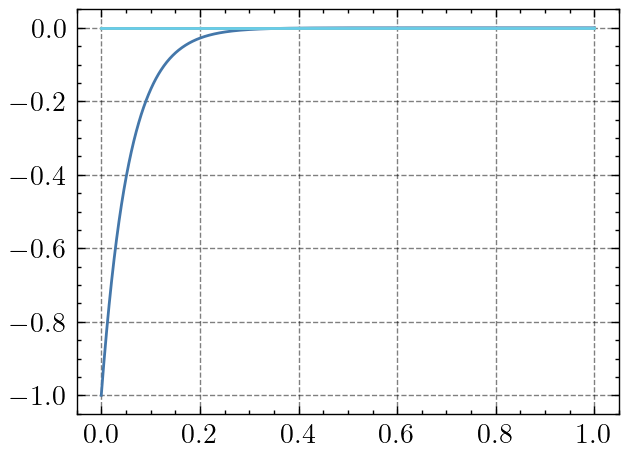

In [151]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
for i in range(N):
    ax.plot(t*1e9, U[i])
# ax.set_yscale('log')